In [4]:
#Import everything needed
import pandas as pd
from pandasgui import show
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


**Some essential info**  

    Neu (Neutral): This score represents the proportion of the text that is neutral. A higher neu score means more of the text is neutral.  

    Neg (Negative): This score indicates the proportion of the text that is negative. A higher neg score means more of the text is negative.  

    Pos (Positive): This score reflects the proportion of the text that is positive. A higher pos score means more of the text is positive.  

    Compound: This is a composite score that calculates the sum of all the lexicon ratings which have been normalized between -1 (most extreme negative) and +1 (most extreme positive). This score is useful for getting an overall sentiment of the text. A higher positive value indicates a more positive overall sentiment, and a higher negative value indicates a more negative overall sentiment.  

**Visualizations for Gucci Mane:**

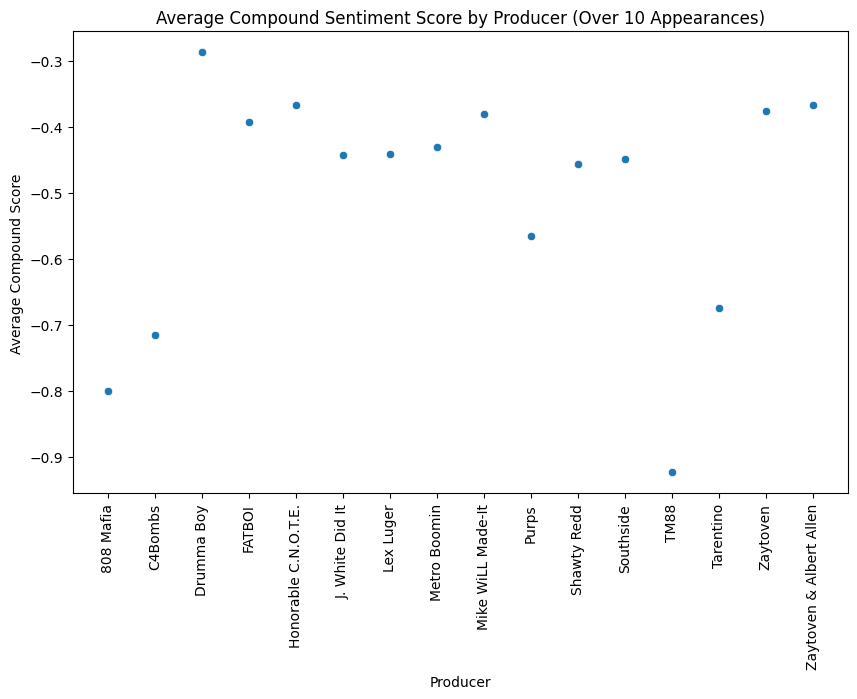

In [3]:
GucciMane = pd.read_csv('FinalDatasets/GucciMane.csv')
# Create dot plot
# Count appearances of each producer
producer_counts = GucciMane['Producer'].value_counts()

# Segment data into two groups: more than 50 appearances and 50 or fewer appearances
producers_over_50 = producer_counts[producer_counts > 10].index
producers_50_or_less = producer_counts[producer_counts <= 10].index

# Filter data based on these segments
data_over_50 = GucciMane[GucciMane['Producer'].isin(producers_over_50)]
data_50_or_less = GucciMane[GucciMane['Producer'].isin(producers_50_or_less)]

# Calculate mean compound values for each segment
mean_compound_over_50 = data_over_50.groupby('Producer')['compound'].mean().reset_index()
mean_compound_50_or_less = data_50_or_less.groupby('Producer')['compound'].mean().reset_index()

# You can then create plots or perform further analysis on these segments
# For example, creating a scatterplot for producers with over 50 appearances
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_compound_over_50, y='compound', x='Producer')
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment Score by Producer (Over 10 Appearances)')
plt.xlabel('Producer')
plt.ylabel('Average Compound Score')
plt.show()

-0.3510727591036415


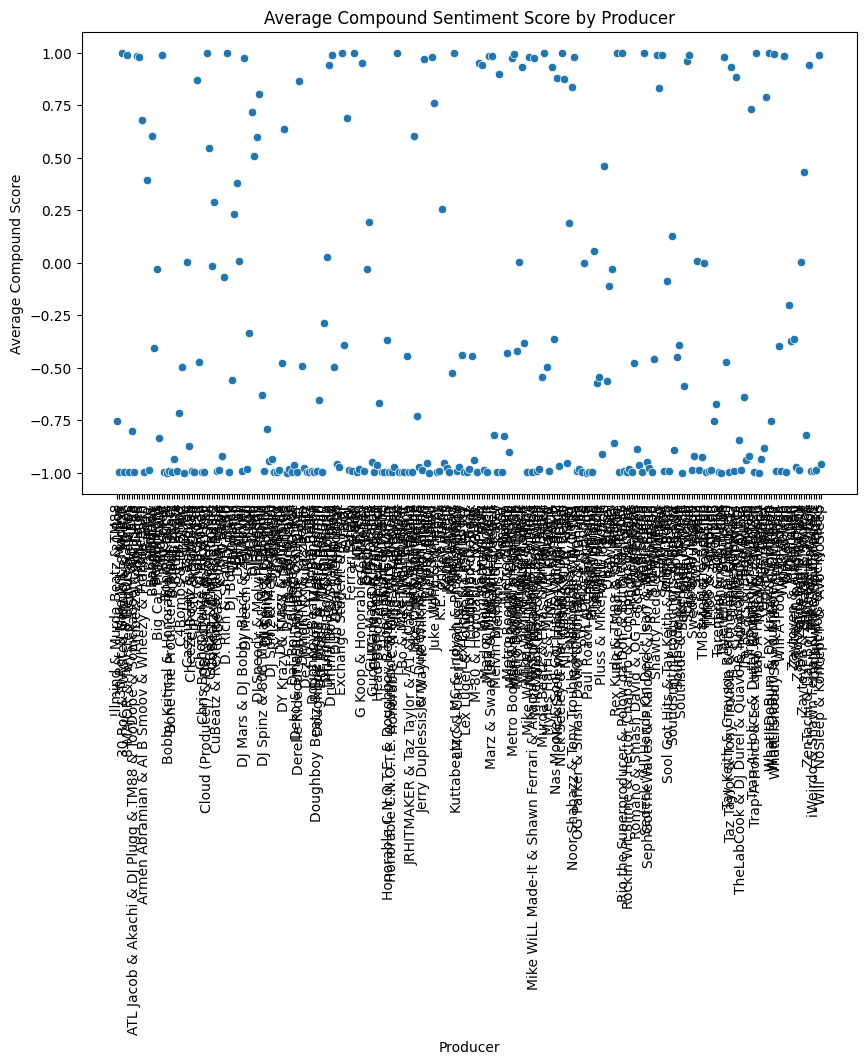

In [34]:
GucciMane = pd.read_csv('FinalDatasets/GucciMane.csv')
# Create dot plot
# Calculate the mean compound value for each producer
mean_compound = GucciMane.groupby('Producer')['compound'].mean().reset_index()

# Create the scatterplot
print(np.mean(GucciMane['compound']))
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_compound, y='compound', x='Producer')
plt.xticks(rotation=90)
plt.title('Average Compound Sentiment Score by Producer')
plt.xlabel('Producer')
plt.ylabel('Average Compound Score')
plt.show()

**Visualization for Taylor Swift:**

Average compound for Taylor Swift:  0.4412131652661065


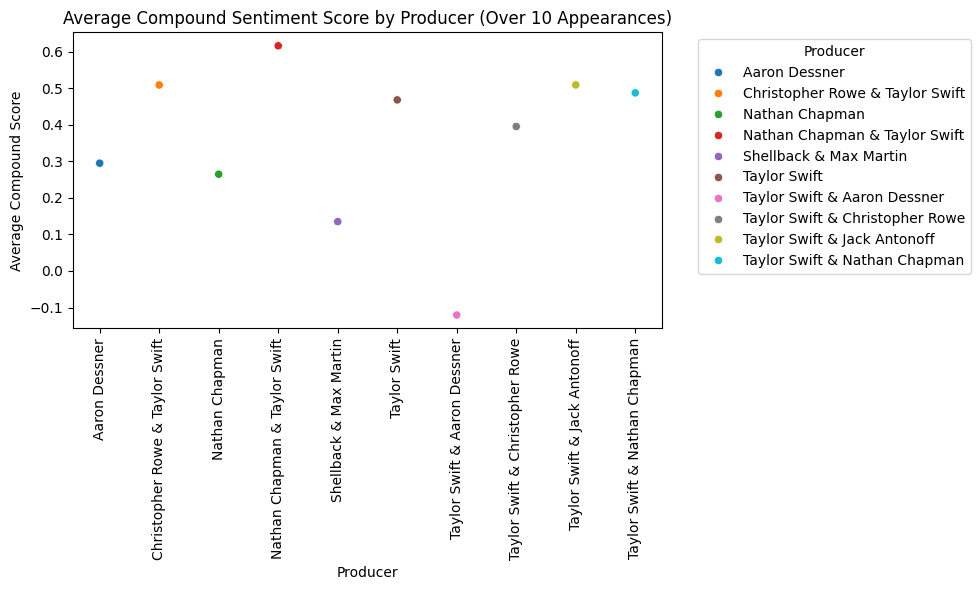

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
TaylorSwift = pd.read_csv('FinalDatasets/TaylorSwift.csv')

# Replacing all occurrences of "Jack Antonoff & Taylor Swift" with "Taylor Swift & Jack Antonoff"
TaylorSwift['Producer'] = TaylorSwift['Producer'].replace('Jack Antonoff & Taylor Swift', 'Taylor Swift & Jack Antonoff')

# Get average compound score for Taylor Swift and print it
mean_compound = TaylorSwift.groupby('Producer')['compound'].mean().reset_index()
print("Average compound for Taylor Swift: ", np.mean(TaylorSwift['compound']))

# Count appearances of each producer
producer_counts = TaylorSwift['Producer'].value_counts()

# Segment data based on appearances
threshold = 10  # Change this value to your desired threshold
producers_over_threshold = producer_counts[producer_counts > threshold].index

# Filter data for producers over the threshold
data_over_threshold = TaylorSwift[TaylorSwift['Producer'].isin(producers_over_threshold)]

# Calculate mean compound values for producers over the threshold
mean_compound_over_threshold = data_over_threshold.groupby('Producer')['compound'].mean().reset_index()

# Assign numeric x-values to each producer
mean_compound_over_threshold['producer_id'] = range(1, len(mean_compound_over_threshold) + 1)

# Create scatterplot with numeric x-values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_compound_over_threshold, x='producer_id', y='compound', hue='Producer')
plt.xticks(mean_compound_over_threshold['producer_id'], mean_compound_over_threshold['Producer'], rotation=90)
plt.title(f'Average Compound Sentiment Score by Producer (Over {threshold} Appearances)')
plt.xlabel('Producer')
plt.ylabel('Average Compound Score')
plt.legend(title='Producer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Observations on Taylor Swift chart**  
Considering the average to be .4, the only big outlier here is "Taylor Swift & Aaron Dessner". That combo should be looked into further.

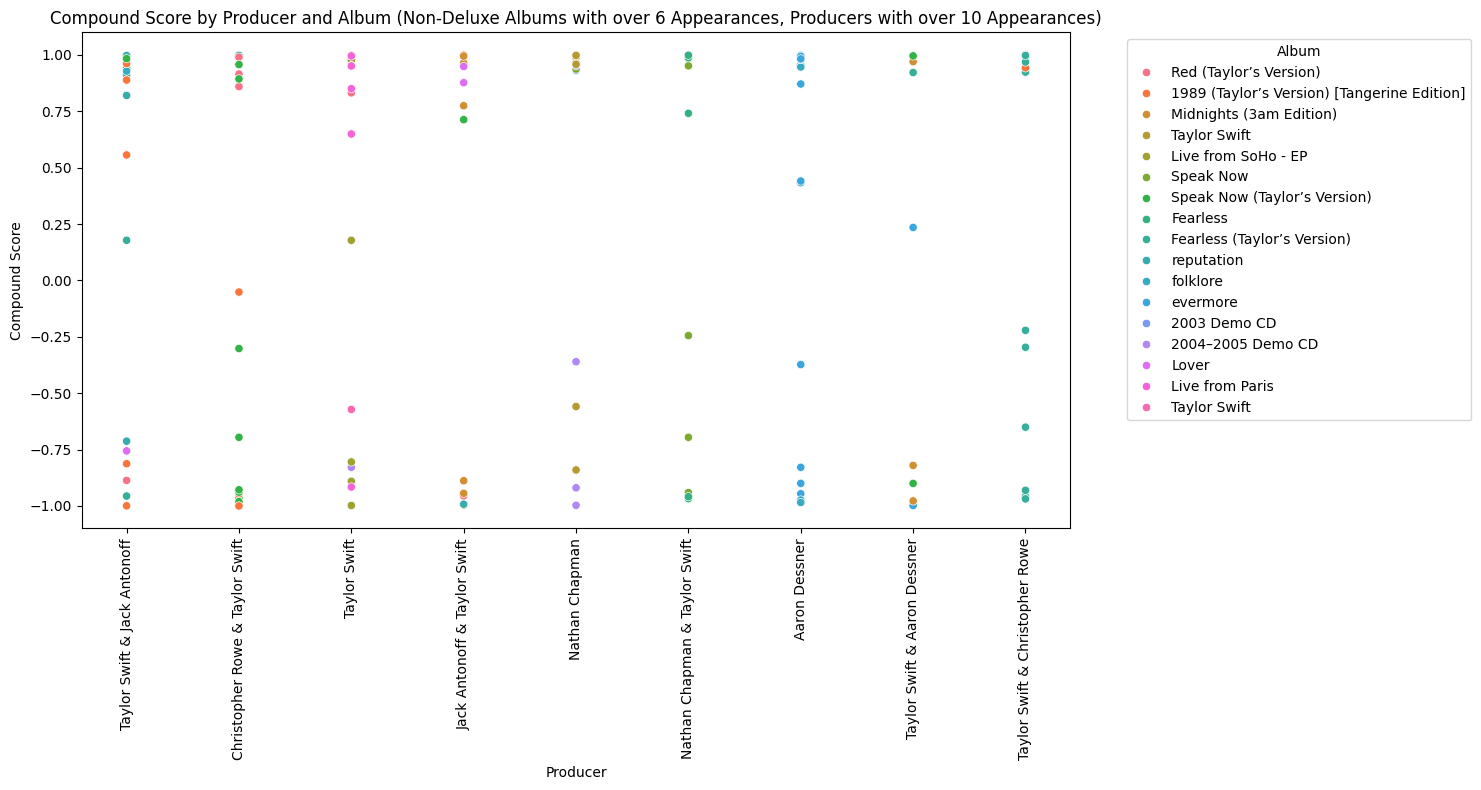

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
taylor_swift_df = pd.read_csv('FinalDatasets/TaylorSwift.csv')

# Filter out rows where 'Album' is NaN (not available)
taylor_swift_filtered = taylor_swift_df.dropna(subset=['Album'])

# Define the threshold for album appearances
album_threshold = 6

# Count appearances of each album and filter out albums with less than the threshold
album_counts = taylor_swift_filtered['Album'].value_counts()
albums_over_threshold = album_counts[album_counts > album_threshold].index
taylor_swift_album_filtered = taylor_swift_filtered[taylor_swift_filtered['Album'].isin(albums_over_threshold)]

# Filter out albums with the word "Deluxe" in their title
taylor_swift_no_deluxe = taylor_swift_album_filtered[~taylor_swift_album_filtered['Album'].str.contains("Deluxe", case=False)]

# Define the threshold for producer appearances
producer_threshold = 10

# Count appearances of each producer in the non-deluxe album dataset
producer_counts = taylor_swift_no_deluxe['Producer'].value_counts()

# Filter out producers with less than the threshold
producers_over_threshold = producer_counts[producer_counts > producer_threshold].index
taylor_swift_final_no_deluxe = taylor_swift_no_deluxe[taylor_swift_no_deluxe['Producer'].isin(producers_over_threshold)]

# Creating a dot plot (scatter plot)
plt.figure(figsize=(15, 8))
sns.scatterplot(data=taylor_swift_final_no_deluxe, x='Producer', y='compound', hue='Album')
plt.xticks(rotation=90)
plt.title('Compound Score by Producer and Album (Non-Deluxe Albums with over 6 Appearances, Producers with over 10 Appearances)')
plt.xlabel('Producer')
plt.ylabel('Compound Score')
plt.legend(title='Album', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Function to create a plot for every person in the folder**  

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_plots(folder_path, folder_saved):
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            dataset = pd.read_csv(file_path)

            # Data manipulations
            mean_compound = dataset.groupby('Producer')['compound'].mean().reset_index()
            overall_avg_compound = np.mean(dataset['compound'])  # Overall average compound score for the artist

            producer_counts = dataset['Producer'].value_counts()
            threshold = 5
            producers_over_threshold = producer_counts[producer_counts > threshold].index
            data_over_threshold = dataset[dataset['Producer'].isin(producers_over_threshold)]
            mean_compound_over_threshold = data_over_threshold.groupby('Producer')['compound'].mean().reset_index()
            mean_compound_over_threshold['producer_id'] = range(1, len(mean_compound_over_threshold) + 1)

            # Create scatterplot and add average line
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=mean_compound_over_threshold, x='producer_id', y='compound', hue='Producer')
            plt.axhline(y=overall_avg_compound, color='r', linestyle='--')
            plt.xticks(mean_compound_over_threshold['producer_id'], mean_compound_over_threshold['Producer'], rotation=90)
            plt.title(f'Average Compound Sentiment Score by Producer (Over {threshold} Appearances) - {file}')
            plt.xlabel('Producer')
            plt.ylabel('Average Compound Score')
            plt.legend(title='Producer', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.tight_layout()
            plt.savefig(os.path.join(folder_saved, f'plot_{file}.png'))
            plt.close()

# To use the function, call generate_plots_with_avg_line('path/to/your/folder')
generate_plots("FinalDatasets", "FinalDatasets/Visualizations/")

**Look for producers with a statistcally significant difference:**  

In [7]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats

def find_significant_producers(folder_path, appearance_threshold):
    significant_producers = {}

    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            dataset = pd.read_csv(file_path)

            # Calculate overall average compound score
            overall_avg_compound = np.mean(dataset['compound'])

            # Count appearances of each producer and filter based on the threshold
            producer_counts = dataset['Producer'].value_counts()
            artist = dataset['Artist'][1]
            significant_producers[artist] = []
            producers_over_threshold = producer_counts[producer_counts > appearance_threshold].index

            # Filter dataset for producers over the threshold
            filtered_dataset = dataset[dataset['Producer'].isin(producers_over_threshold)]

            # Group by producer and calculate mean compound
            producer_compounds = filtered_dataset.groupby('Producer')['compound'].apply(list).to_dict()

            for producer, compounds in producer_compounds.items():
                # Perform t-test between each producer's compounds and the overall average
                # Only proceed if there are more than one data points
                if len(compounds) > 1:
                    t_stat, p_value = stats.ttest_1samp(compounds, overall_avg_compound)
                    # Consider p-values less than 0.05 as statistically significant
                    if p_value < 0.05:
                        significant_producers[artist].append([producer, p_value])

    return significant_producers

significant_producers = find_significant_producers('FinalDatasets', 5)

def makeSignificantProducersTable(dataset):
    artistName = []
    producerName = []
    pValue = []
    significant = []
    print(dataset)
    for artist, producer in dataset.items():
        if producer != []:
            for value in producer:
                artistName.append(artist)
                producerName.append(value[0])
                pValue.append(value[1])
                significant.append("yes")
    print(len(artistName))
    print(len(producerName))
    print(len(pValue))
    data = {
    'Artist': artistName,
    'Producer': producerName,
    'Pvalue': pValue,
    'Significant': significant
    }
    dataframe = pd.DataFrame(data)
    # Save the DataFrame to a CSV file
    file_name = os.path.basename("SignificantProducers" +".csv")
    file_path = os.path.join("FinalDatasets/SigData/", file_name)
    dataframe.to_csv(file_path, index=True)
    show(dataframe)

    
                    

#Have a dictionary with all the significant producers and their p value.
print(significant_producers)
makeSignificantProducersTable(significant_producers)


PandasGUI INFO — pandasgui.gui — Opening PandasGUI


{'A$AP Rocky': [['Clams Casino', 0.0005787353751789444]], 'Avril Lavigne': [['Dr. Luke & Matt Beckley & Steven Wolf', 0.02361601082152187], ['The Submarines & Dr. Luke', 2.5177245263352314e-16]], 'Chief Keef': [['Bass Kids', 4.929962640263844e-06], ['Chopsquad DJ & Young Chop', 0.003769467142745832], ['DP Beats', 0.048615865154127656], ['Dolan Beats', 0.009522534007407235], ['ISOBeats', 0.039913967717183835]], 'Drake': [], 'Ed Sheeran': [['Louis Bell & \u200bwatt', 1.6766156428098e-13], ['\u200bwatt & Louis Bell', 2.7559365006894423e-11]], 'Ellie Goulding': [], 'Gucci Mane': [['808 Mafia', 0.0016762811334732884], ['Bangladesh', 0.015798564312951163], ['Big Cat Productions', 0.00353605777710924], ['C4Bombs', 0.009987192912812193], ['DJ Scream', 0.0023738906796082226], ['TM88', 2.4703454120806938e-08], ['Tarentino', 0.04971589708616787]], 'Kanye West': [['Twitter', 0.0010758078274818103]], 'Katy Perry': [['Cirkut & Dr. Luke & Max Martin', 1.4244473795305271e-12], ['StarGate', 0.045584744

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\1372904052.py:69: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\1372904052.py:69: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\1372904052.py:69: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\1372904052.py:69: FutureWarning:

Series.__g

**Making a visualization with the significant producers:**  

In [20]:
#First things first I need to join tables
import pandas as pd
from pandasgui import show
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

def joinTables(artistData):
    #Get the data in and segment it
    for csv in artistData:
        significant_producers_df = pd.read_csv('FinalDatasets/SigData/SignificantProducers.csv')
        significant_producers_subset = significant_producers_df[['Producer', 'Pvalue', 'Significant']]
        artist_df = pd.read_csv("FinalDatasets/"+csv)

        #Join the Tables
        joined_df = pd.merge(artist_df, significant_producers_subset, on='Producer', how='left')

        #Save it to a csv
        file_name = os.path.basename(csv)
        file_path = os.path.join("FinalDatasets/SigData/", file_name)
        joined_df.to_csv(file_path, index=False)
    show(joined_df)


# Specify the path of the folder
folder_path = 'FinalDatasets'
# Iterate through the files and directories in the folder
fileList = []
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    # Check if it's a file or directory
    if os.path.isfile(file_path):
        print(f"File: {filename}")
        fileList.append(filename)
    elif os.path.isdir(file_path):
        print(f"Directory: {filename}")

#Run function for all the datasets
print(fileList)
joinTables(fileList)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


File: A$APRocky.csv
File: AvrilLavigne.csv
File: ChiefKeef.csv
File: Drake.csv
File: EdSheeran.csv
File: EllieGoulding.csv
File: GucciMane.csv
File: KanyeWest.csv
File: KatyPerry.csv
File: KidCudi.csv
File: LanaDelRey.csv
File: LUCKI.csv
File: MetroBoomin.csv
File: MikeDean.csv
File: PlayboiCarti.csv
Directory: SigData
File: TaylorSwift.csv
File: Tyler,TheCreator.csv
Directory: Visualizations
File: YungLean.csv
['A$APRocky.csv', 'AvrilLavigne.csv', 'ChiefKeef.csv', 'Drake.csv', 'EdSheeran.csv', 'EllieGoulding.csv', 'GucciMane.csv', 'KanyeWest.csv', 'KatyPerry.csv', 'KidCudi.csv', 'LanaDelRey.csv', 'LUCKI.csv', 'MetroBoomin.csv', 'MikeDean.csv', 'PlayboiCarti.csv', 'TaylorSwift.csv', 'Tyler,TheCreator.csv', 'YungLean.csv']


C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\736146796.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\736146796.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\736146796.py:23: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Grant\AppData\Local\Temp\ipykernel_20504\736146796.py:23: FutureWarning:

Series.__getit

**Code for the Visualizations:**  

In [4]:
import pandas as pd
from pandasgui import show
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

def generate_plots(folder_path, folder_saved):
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            try:
                file_path = os.path.join(folder_path, file)
                dataset = pd.read_csv(file_path)
                print(dataset["Artist"][1])
                # Count appearances of each producer
                producer_counts = dataset['Producer'].value_counts()
                producers_over_threshold = producer_counts[producer_counts > 5].index

                # Filter data for producers over the threshold
                filtered_dataset = dataset[dataset['Producer'].isin(producers_over_threshold)]

                # Calculate the average 'compound' for each producer
                mean_compound = filtered_dataset.groupby('Producer')['compound'].mean().reset_index()

                # Include the 'Significant' column with left join
                significant_col = filtered_dataset[['Producer', 'Significant']].drop_duplicates()
                merged_data = pd.merge(mean_compound, significant_col, on='Producer', how='left')

                # Fill NA values in 'Significant' column
                merged_data['Significant'] = merged_data['Significant'].fillna('Not Significant')

                # Calculate overall average compound score for the artist
                overall_avg_compound = np.mean(filtered_dataset['compound'])

                # Create scatterplot and add average line
                plt.figure(figsize=(10, 6))
                sns.scatterplot(data=merged_data, x='Producer', y='compound', hue='Significant')
                plt.axhline(y=overall_avg_compound, color='r', linestyle='--')  # Average line
                plt.xticks(rotation=90)
                plt.title(f'Average Compound Sentiment Score by Producer - {file}')
                plt.xlabel('Producer')
                plt.ylabel('Average Compound Score')
                plt.legend(title='Significant', bbox_to_anchor=(1.05, 1), loc='upper left')
                plt.tight_layout()
                plt.savefig(os.path.join(folder_saved, f'plot_{file}.png'))
                plt.close()
            except:
                print("Damn there was an error")

# Example usage
generate_plots("FinalDatasets/SigData/", "FinalDatasets/Visualizations/Significance")






A$AP Rocky
Avril Lavigne
Chief Keef
Drake
Ed Sheeran
Ellie Goulding
Gucci Mane
Kanye West
Katy Perry
Kid Cudi
Lana Del Rey
LUCKI
Metro Boomin
MIKE DEAN
Playboi Carti
Avril Lavigne
Damn there was an error
Taylor Swift
Tyler, The Creator
Yung Lean
